In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [37]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')
print(image.shape)

(540, 960, 3)


In [38]:
y_size = image.shape[0]
x_size = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

In [39]:
# define color criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [40]:
# define a triangular region of interest

left_bottom = [0, y_size]
right_bottom = [x_size, y_size]
apex = [x_size/2, y_size/2]

fit_left = np.polyfit( (left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit( (right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit( (left_bottom[0], right_bottom[1]), (left_bottom[1], right_bottom[1]), 1)

XX, YY = np.meshgrid( np.arange(0, x_size), np.arange(0, y_size) )

In [41]:
region_thresholds = (YY > (XX*fit_left[0]   + fit_left[1])) & \
                    (YY > (XX*fit_right[0]  + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [42]:
# apply color selection
color_thresholds = (color_select[:,:,0] < rgb_threshold[0]) | \
                   (color_select[:,:,1] < rgb_threshold[1]) | \
                   (color_select[:,:,2] < rgb_threshold[2])

print(color_thresholds)

#mask color selection
color_select[color_thresholds] = [0, 0, 0]

[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


In [43]:
# combine filters
line_image[~color_thresholds & region_thresholds] = [255, 0,0]

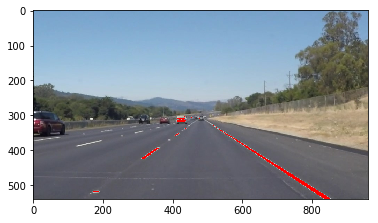

In [44]:
plt.imshow(line_image)
plt.show()